In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/remoteok_jobs_final.csv")

In [3]:
df.head()

,id,date,company,position,tags,location,salary_min,salary_max,url
0,1093611,2025-07-12 06:08:36+00:00,The Singleton Group,Work From Home Customer Service Representative,"['admin', 'customer support', 'data entry', 'c...",Worldwide,80000,90000,https://remoteOK.com/remote-jobs/remote-work-f...
1,1093607,2025-07-11 14:43:16+00:00,Lobstr.Io,Backend Developer @ Lobstr.Io Python Scraping ...,"['dev', 'python', 'backend', 'redis', 'remote'...",Worldwide,30000,40000,https://remoteOK.com/remote-jobs/remote-backen...
2,1093606,2025-07-11 11:00:03+00:00,Caiz,Chief Executive Officer Crypto Blockchain,"['crypto', 'cryptocurrency', 'system', 'securi...",Worldwide,50000,100000,https://remoteOK.com/remote-jobs/remote-chief-...
3,1093598,2025-07-10 15:00:10+00:00,Yassir,Senior Mobile Ios Engineer,"['ios', 'design', 'redis', 'frontend', 'back-e...",Worldwide,60000,120000,https://remoteOK.com/remote-jobs/remote-senior...
4,1093596,2025-07-10 13:00:03+00:00,Anchorage Digital,Member Of Technical Staff Transparency,"['design', 'crypto', 'front-end', 'back-end', ...",United States,60000,115000,https://remoteOK.com/remote-jobs/remote-member...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97 non-null     int64 
 1   date        97 non-null     object
 2   company     97 non-null     object
 3   position    97 non-null     object
 4   tags        97 non-null     object
 5   location    97 non-null     object
 6   salary_min  97 non-null     int64 
 7   salary_max  97 non-null     int64 
 8   url         97 non-null     object
dtypes: int64(3), object(6)
memory usage: 6.9+ KB


In [5]:
top_locations = df["location"].value_counts().head(10)

In [6]:
top_locations

location
Worldwide              65
Remote                  6
United States           3
Us, Ca, Santa Clara     2
India                   1
Bengaluru               1
Us                      1
Canada                  1
Globally Remote         1
Washington Dc           1
Name: count, dtype: int64

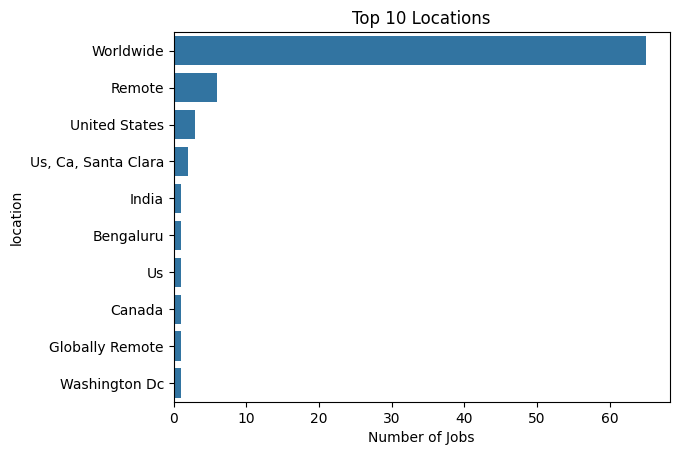

In [7]:
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 10 Locations")
plt.xlabel("Number of Jobs")
plt.show()

In [8]:
from collections import Counter
import ast

In [9]:
print(df["tags"])

0     ['admin', 'customer support', 'data entry', 'c...
1     ['dev', 'python', 'backend', 'redis', 'remote'...
2     ['crypto', 'cryptocurrency', 'system', 'securi...
3     ['ios', 'design', 'redis', 'frontend', 'back-e...
4     ['design', 'crypto', 'front-end', 'back-end', ...
                            ...                        
92    ['saas', 'salesforce', 'training', 'support', ...
93                ['golang', 'reliability', 'engineer']
94    ['golang', 'software', 'saas', 'senior', 'gola...
95    ['assistant', 'bitcoin', 'support', 'growth', ...
96    ['system', 'training', 'recruiter', 'support',...
Name: tags, Length: 97, dtype: object


In [10]:
df["tags"] = df["tags"].apply(ast.literal_eval)

In [11]:
tags = df["tags"].dropna()

In [12]:
flat_tags = [tag for sublist in tags for tag in sublist]

In [13]:
tag_counts = Counter(flat_tags)

In [14]:
top_tags = tag_counts.most_common(10)

In [15]:
tags_df = pd.DataFrame(top_tags, columns=["Tag", "Count"])

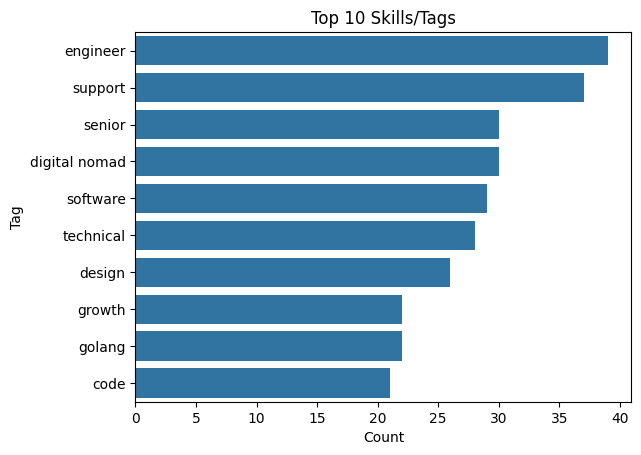

In [16]:
sns.barplot(x="Count", y="Tag", data=tags_df)
plt.title("Top 10 Skills/Tags")
plt.show()

In [17]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

bydate = df.groupby(df["date"].dt.date).size()

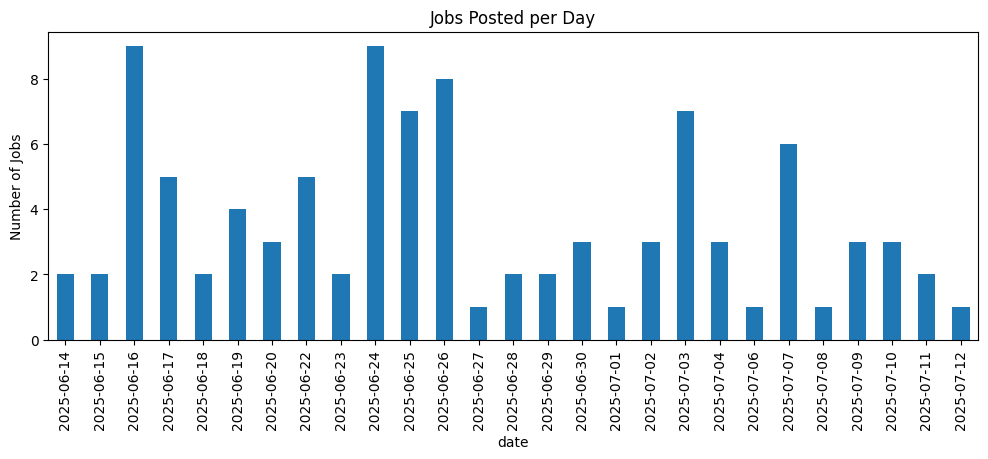

In [18]:
bydate.plot(kind="bar", figsize=(12,4))
plt.title("Jobs Posted per Day")
plt.ylabel("Number of Jobs")
plt.show()

In [19]:
print(df[["salary_min", "salary_max"]].head())

   salary_min  salary_max
0       80000       90000
1       30000       40000
2       50000      100000
3       60000      120000
4       60000      115000


In [20]:
df["avg_salary"] = (df["salary_min"] + df["salary_max"]) / 2

In [21]:
df_salary = df[df["avg_salary"] > 0]
df_salary = df_salary[df_salary["avg_salary"] < 500_000]

In [22]:
print(df_salary["avg_salary"].describe())

count        94.000000
mean      86303.191489
std       49447.523943
min       10000.000000
25%       65625.000000
50%       87500.000000
75%       95000.000000
max      380000.000000
Name: avg_salary, dtype: float64


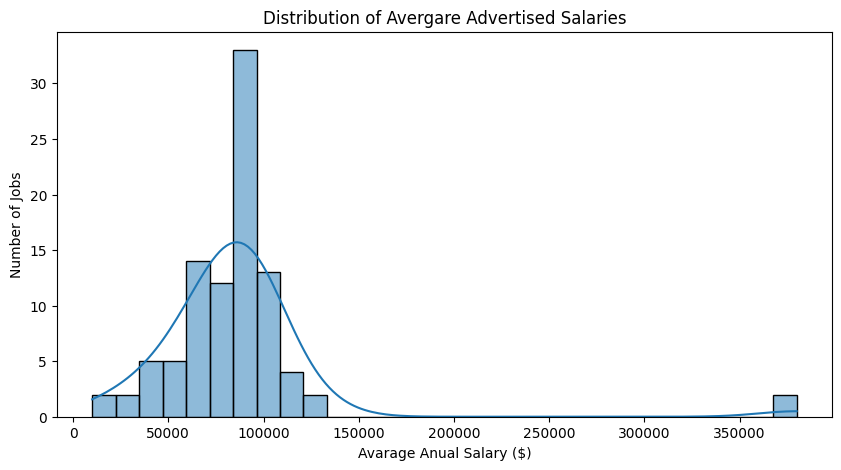

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df_salary["avg_salary"], bins=30, kde=True)
plt.title("Distribution of Avergare Advertised Salaries")
plt.xlabel("Avarage Anual Salary ($)")
plt.ylabel("Number of Jobs")
plt.savefig("../reports/remoteok_salary_distribution.png")
plt.show()

In [26]:
from collections import defaultdict

In [27]:
tags_series = df_salary["tags"].dropna()

In [28]:
tag_salaries = []

for _,row in df_salary.iterrows():
    tags = row["tags"]
    salary = row["avg_salary"]
    if isinstance(tags, list):
        for tag in tags:
            tag_salaries.append((tag.lower(), salary))

In [29]:
salary_by_tag = defaultdict(list)

In [30]:
for tag, salary in tag_salaries:
    salary_by_tag[tag].append(salary)

tag_salary_avg = {tag: sum(sals)/len(sals) for tag, sals in salary_by_tag.items()}

In [31]:
top_salary_tags = sorted(tag_salary_avg.items(), key=lambda x: x[1], reverse=True)[:10]
top_salary_tags

[('postgres', 380000.0),
 ('content writing', 380000.0),
 ('startup', 215000.0),
 ('ads', 210000.0),
 ('tailwind', 207500.0),
 ('aws', 183333.33333333334),
 ('remote', 178333.33333333334),
 ('full stack', 155000.0),
 ('node', 151750.0),
 ('social media', 138333.33333333334)]

In [32]:
tags_df = pd.DataFrame(top_salary_tags, columns=["Tag", "Avg_Salary"])

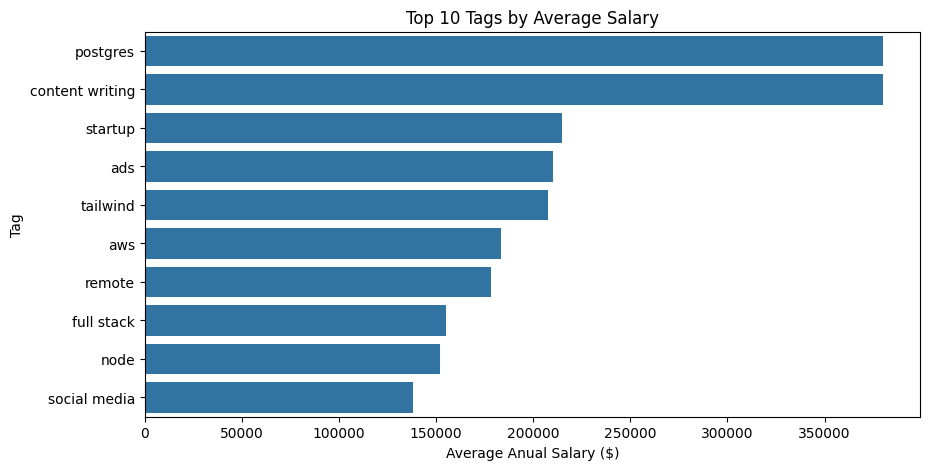

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Avg_Salary", y="Tag", data=tags_df)
plt.title("Top 10 Tags by Average Salary")
plt.xlabel("Average Anual Salary ($)")
plt.savefig("../reports/remoteok_tags_by_salary.png")
plt.show()

In [34]:
company_salary = df_salary.groupby("company")["avg_salary"].mean().sort_values(ascending=False).head(10)
company_salary

company
Interaction Design Foundation    380000.0
Loancrate                        380000.0
Sumo Group                       132500.0
Lemon.Io                         120000.0
Transperfect                     117500.0
Liatrio                          115000.0
Meeting Tomorrow                 115000.0
Medely                           103750.0
Mysten Labs                      102500.0
Jump                             100000.0
Name: avg_salary, dtype: float64

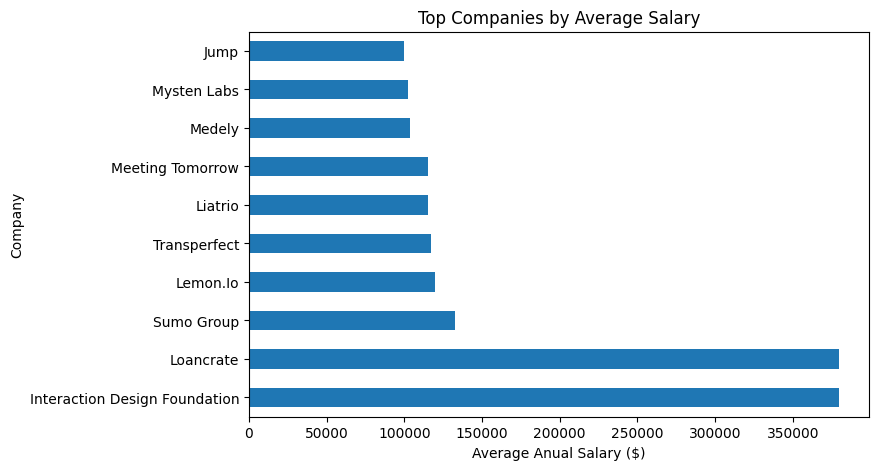

In [35]:
company_salary.plot(kind="barh", figsize=(8, 5))
plt.title("Top Companies by Average Salary")
plt.xlabel("Average Anual Salary ($)")
plt.ylabel("Company")
plt.savefig("../reports/remoteok_companies_by_salary.png")
plt.show()

### Exploratory Salary Analysis
I analyzed the salary data from 97 jobs postings which were scraped from RemoteOK. After basic cleaning, 94 of the jobs reported both a min and max salary, which I used to compute an average salary for each listing. The acerage advertised salary across these offers is approximately <b>\\$86k</b> anually, with most salaries clustering between <b>\\$60k</b> and <b>\\$100k</b>

### Tags and Roles
To explore how advertised pay varies by role, I analyzed the tags associated with each job. Some of them with higher pay were <b>PostgreSQL</b>, <b>ads</b> and <b>AWS</b>. Generic tags like engineer or senior appear frequently but do not provide detailed skills signals on their own (in a real pipeline, more detailed NLP would help extract concrete skills like Python, React or PowerBI).

### Companies
While some companies report multiple listings, the sample of this dataset is not large enough to provide insights for companies. In a larger project, grouping by company would help identify employers that constantly pay above or below average. Nevertheless, I found out that companies like <b>Loancrate</b> and <b>Interaction Design Foundation</b> pay way above the average.

### Next steps
To deepen this analysis, next steps would be to
- scrape additional job board to increase coverage,
- use natural language processing (NLP) to extract more specific skills from descriptions,
- build an interactive dashboard to let users filter by tag, location and salary range.